In [1]:
# import gymnasium as gym
from IoT import *
import numpy as np
from ppo_torch import Agent
from utils import *


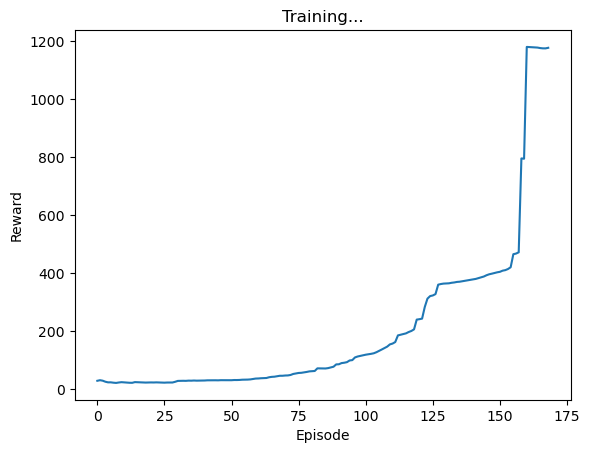

In [2]:
# env = gym.make('CartPole-v0')
env = env_example()
N = 20
batch_size = 64
n_epochs = 10
alpha = 0.0003
agent = Agent(n_actions=env.action_space.n, batch_size=batch_size, 
                alpha=alpha, n_epochs=n_epochs, 
                input_dims=env.state_shape())
n_games = 1000


best_score = 0
score_history = []

learn_iters = 0
avg_score = 0
n_steps = 0

for i in range(n_games+1):
    observation,_ = env.reset()
    done = False
    score = 0
    while not done:
        action, prob, val = agent.choose_action(observation)
        observation_, reward, done, info,_ = env.step(action)
        n_steps += 1
        score += reward
        agent.remember(observation, action, prob, val, reward, done)
        if n_steps % N == 0:
            agent.learn()
            learn_iters += 1
        observation = observation_
    score_history.append(score)


    avg_score = np.mean(score_history[-100:])
    if avg_score > best_score:
        best_score = avg_score
        agent.save_models()

    # print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
    #         'time_steps', n_steps, 'learning_steps', learn_iters)

    plot_result(score_history, i==n_games)
    

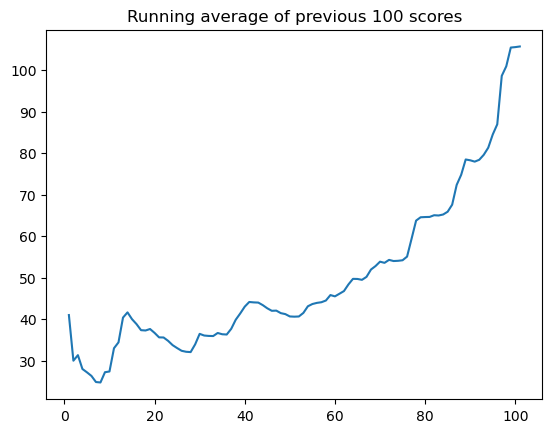

In [ ]:
figure_file = 'plots/cartpole.png'
x = [i+1 for i in range(len(score_history))]
plot_learning_curve(x, score_history, figure_file)
